In [1]:
import wfdb
import numpy as np
import matplotlib.pyplot as plt
import os 
import random

In [2]:
# ECG 데이터와 주석 파일 로드
file_path = '../data/nsr_db_number.txt'
data_path = '../data/mit-bih-normal-sinus-rhythm-database-1.0.0/'
save_path = '/datapath/normal/'


In [3]:
# 시간 문자열을 초로 변환하는 함수
def time_to_seconds(time_str):
    h, m, s = map(int, time_str.split(':'))
    return h * 3600 + m * 60 + s

In [4]:
def standardize_data(data):
    
    mean = np.mean(data)
    std = np.std(data)
    if std > 0:
        return (data - mean) / std
    else:
        return data - mean  # 표준편차가 0이면 평균만 빼줌.

In [5]:
def split_and_save_data(data, db_number, sample_duration, save_path):
    # 데이터 길이와 샘플 수 계산
    data = standardize_data(data)
    num_samples = len(data) // sample_duration
    
    # 데이터 블록 나누기
    blocks = [data[i*sample_duration:(i+1)*sample_duration] for i in range(num_samples)]
    
    # 랜덤으로 블록 샘플링
    selected_blocks = random.sample(blocks, k=max(300,len(blocks)))
    
    # 데이터 저장
    if not os.path.exists(save_path):
        os.makedirs(save_path)
    
    for i, block in enumerate(selected_blocks):
        np.save(os.path.join(save_path, f'{db_number}_block_{i}.npy'), block)

In [6]:
# 데이터 처리 함수
def process_data(db_number, data_path, save_path):
    # 데이터 로드
    record = wfdb.rdrecord(data_path + db_number)
    fs = record.fs

    # 20초 간격으로 샘플 번호 계산
    samples_20sec = 20 * fs
    
    # ECG 데이터 추출
    data = record.p_signal
    
    split_and_save_data(data, f'{db_number}', samples_20sec, save_path)

In [7]:
def process_all_data(file_path, data_path, save_path):
    # 파일에서 db_number 목록 읽기
    with open(file_path, 'r') as file:
        db_numbers = [line.strip() for line in file.readlines() if line.strip()]
    
    for db_number in db_numbers:
        print(f'Processing db_{db_number}...')
        process_data(db_number, data_path, save_path)

In [8]:
process_all_data(file_path, data_path, save_path)

Processing db_16265...
Processing db_16272...
Processing db_16273...
Processing db_16420...
Processing db_16483...
Processing db_16539...
Processing db_16773...
Processing db_16786...
Processing db_16795...
Processing db_17052...
Processing db_17453...
Processing db_18177...
Processing db_18184...
Processing db_19088...
Processing db_19090...
Processing db_19093...
Processing db_19140...
Processing db_19830...


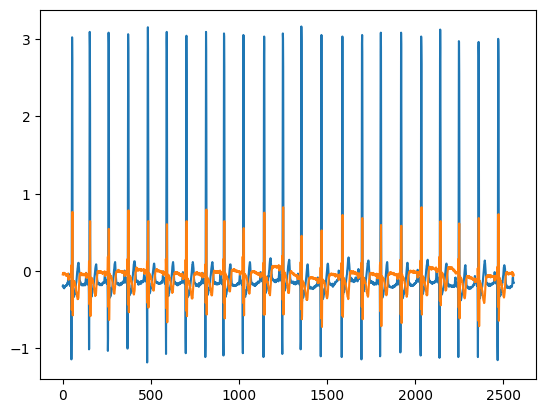

In [28]:
n = np.load('/datapath/normal/db_16265/db16265_block_1001.npy')
plt.plot(n)
plt.show()

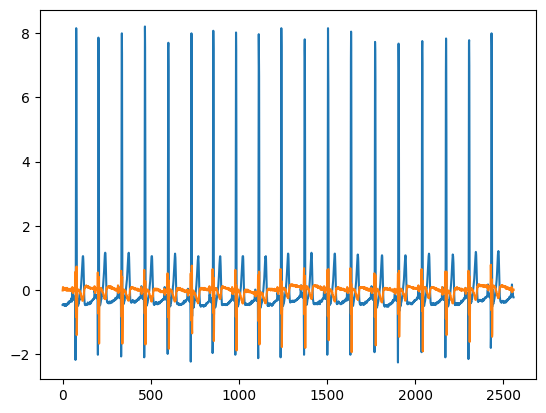

In [10]:
n = np.load('/datapath/normal/16265_block_1001.npy')
plt.plot(n)
plt.show()

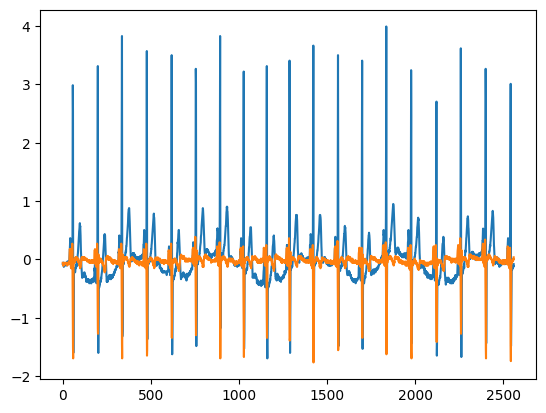

In [43]:
n = np.load('/datapath/normal/db_16272/db16272_block_0.npy')
plt.plot(n)
plt.show()

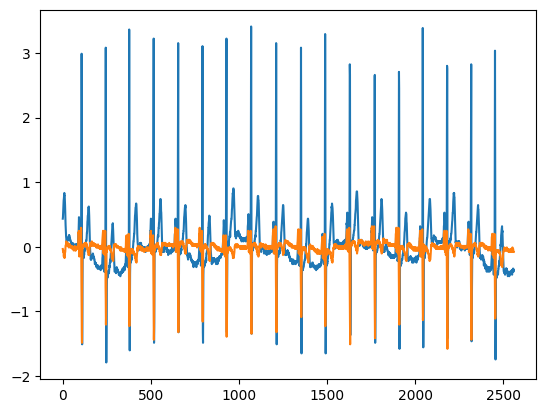

In [14]:
n = np.load('/datapath/normal/16272_block_10.npy')
plt.plot(n)
plt.show()

In [8]:
### Experiments

In [11]:
db_number = '16265'

In [12]:
record = wfdb.rdrecord(data_path + db_number)  # 100번 기록을 예로 사용 (MIT-BIH Arrhythmia Database)

In [13]:
record

In [18]:
ann = wfdb.rdann(data_path + db_number, 'atr')

In [20]:
ann.symbol

['|',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N'

In [21]:
len(ann.symbol)

100955

In [22]:
len(record.p_signal)

11730944

In [23]:
record.p_signal

array([[-0.165, -0.325],
       [-0.155, -0.325],
       [-0.195, -0.305],
       ...,
       [-0.05 , -0.095],
       [-0.05 , -0.085],
       [-0.05 , -0.085]])